In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.integrate import odeint

In [5]:
def model(state, t):
    """
    ODEs of the oscillator model.

    Parameters
    ----------
        state: list
            Contains u, v, w, x, y, z.
                u, v, w: mRNA levels
                x, y, z: protein levels
        t: numpy array
            Time steps.

    Returns
    -------
        A list of the new states of u, v, w, x, y, and z.
    """
    u, v, w, x, y, z = state
    beta1, beta2, beta3 = beta
    alpha1, alpha2, alpha3 = alpha
    gamma1, gamma2, gamma3 = gamma
    dudt = (alpha1 / (1 + z ** gamma1)) - u
    dvdt = (alpha2 / (1 + x ** gamma2)) - v
    dwdt = (alpha3 / (1 + y ** gamma3)) - w
    dxdt = -beta1 * (x - u)
    dydt = -beta2 * (y - v)
    dzdt = -beta3 * (z - w)
    return [dudt, dvdt, dwdt, dxdt, dydt, dzdt]

In [15]:
# Default parameters
t = np.linspace(0, 300, 1000)
init_state = [20.0, 0, 0, 0, 0, 0]
alpha = [216.404, 216.404, 216.404]  # rates of transcription
beta = [1.0, 0.2, 0.2]  # protein / mRNA decay
gamma = [3, 2, 2]  # cooperativity

In [16]:
result = odeint(model, y0=init_state, t=t)
df = pd.DataFrame(result, columns=list("uvwxyz"))
df["t"] = t

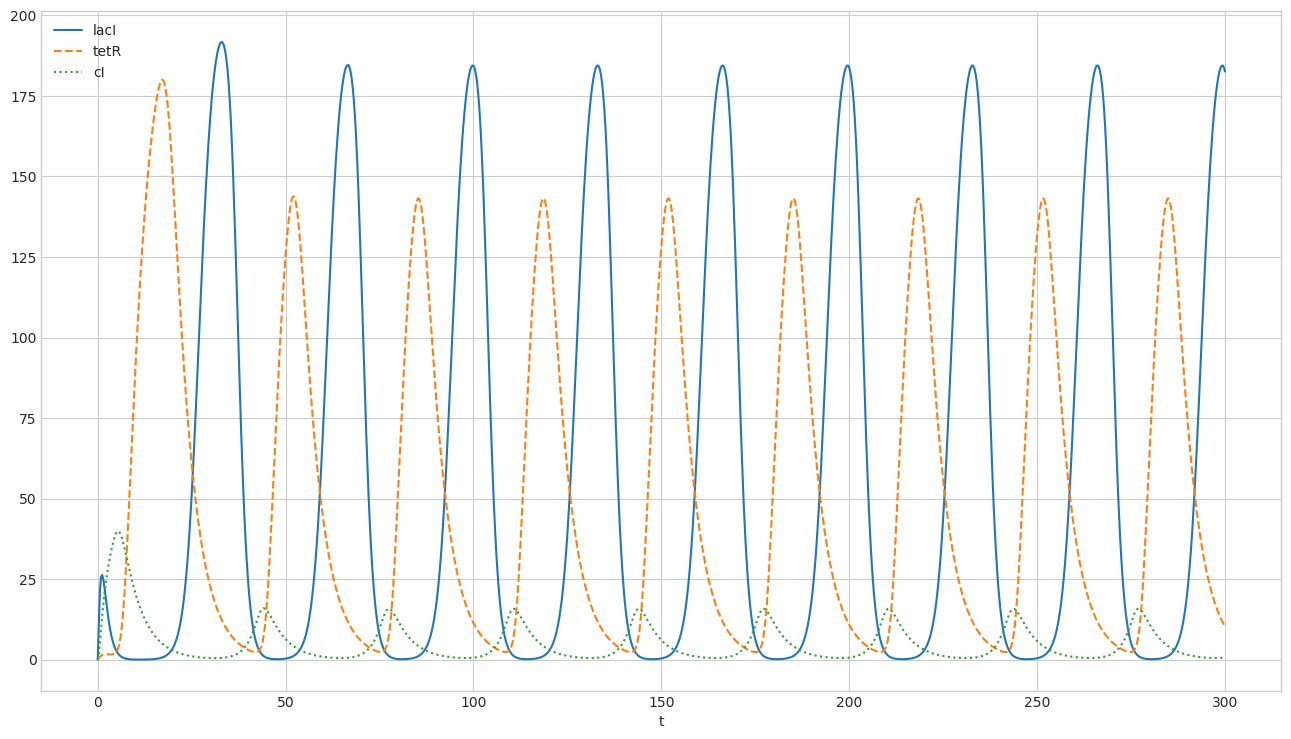

In [17]:
# Protein plot
fig = plt.figure(figsize=(16,9), dpi=100)
sns.set_style("whitegrid")
plt.plot(df.t, df.x, "-", label="lacI")
plt.plot(df.t, df.y, "--", label="tetR")
plt.plot(df.t, df.z, ":", label="cI")
plt.legend(loc="best")
plt.xlabel("t")
plt.show()

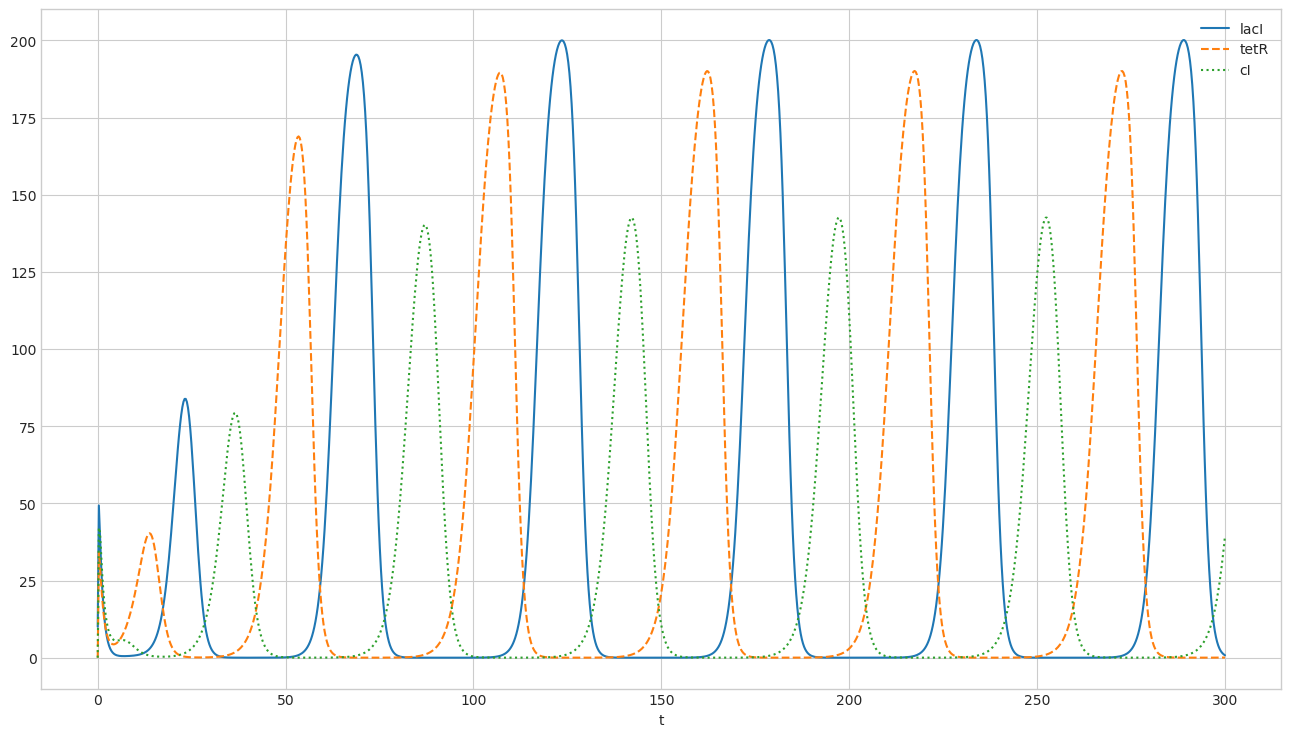

In [10]:
# mRNA plot
fig = plt.figure(figsize=(16,9), dpi=100)
sns.set_style("whitegrid")
plt.plot(df.t, df.u, label="lacI")
plt.plot(df.t, df.v, "--", label="tetR")
plt.plot(df.t, df.w, ":", label="cI")
plt.legend(loc="best")
plt.xlabel("t")
plt.show()

In [7]:
df

,u,v,w,x,y,z,t
0,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,55.735557,29.148408,43.330713,2.528990,1.227866,1.555232,0.300300
2,48.287401,25.105053,43.757379,5.466086,2.759077,4.085815,0.600601
3,37.809836,19.857571,37.003543,7.647853,3.904239,6.206180,0.900901
4,29.112130,15.481811,30.245890,9.140151,4.700539,7.798275,1.201201
5,22.343005,12.059851,24.568632,10.096413,5.223940,8.933867,1.501502
6,17.180885,9.444493,20.054517,10.651397,5.541924,9.706979,1.801802
7,13.281640,7.471029,16.563555,10.911859,5.708572,10.202856,2.102102
8,10.353700,5.997173,13.917063,10.959703,5.765798,10.492050,2.402402
9,8.165415,4.908666,11.949120,10.856846,5.745607,10.630839,2.702703
